Задание: результаты марафона

Загрузите данные по итогам марафона
https://video.ittensive.com/python-advanced/marathon-data.csv

Приведите время половины и полной дистанции к секундам.
Найдите, данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn).

Найдите коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr.

Постройте график jointplot для коррелирующих данных.

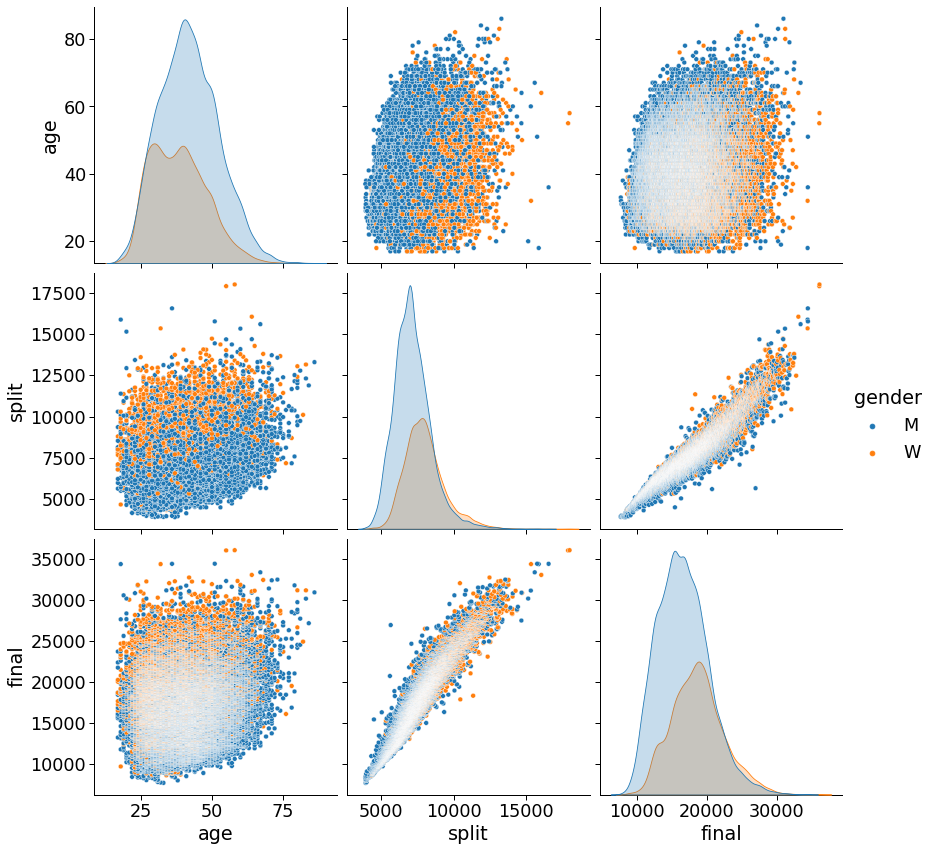

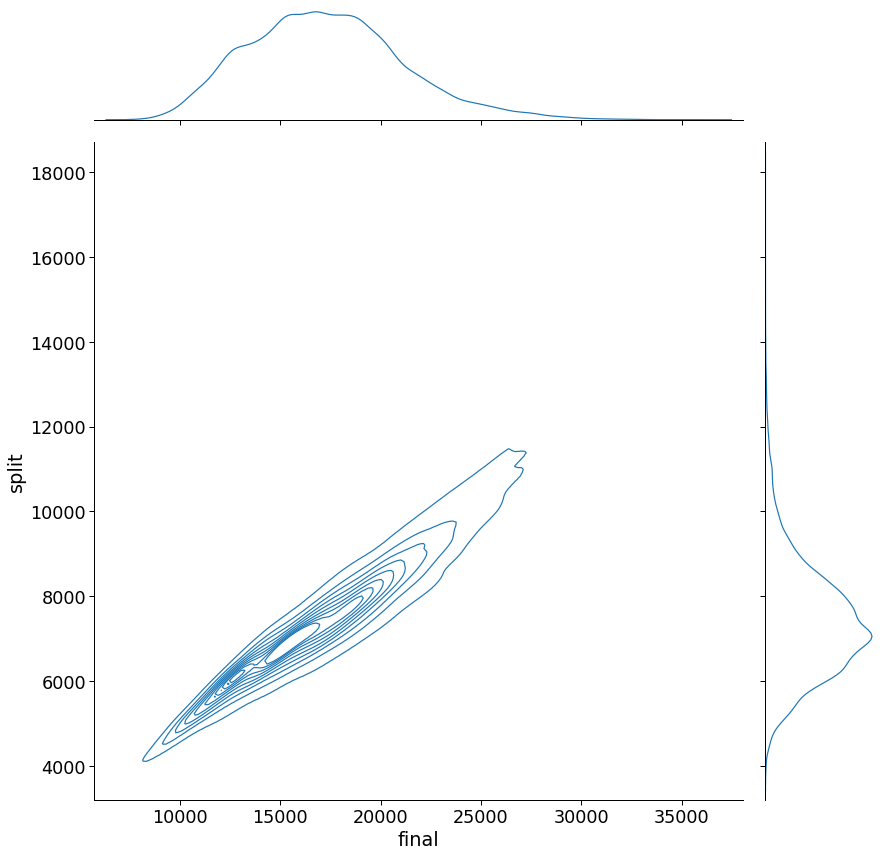

Коэффицент корреляции Присона 0.96


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# подключив все требуемые библиотеки доп. подключим rcParams, чтобы задать параметры холста без непосредственного его создания.
from matplotlib import rcParams
import scipy.stats as stats

# для seaborn увеличим шрифт по умолчанию 
rcParams['figure.figsize'] = 12, 10  # задали размер холста
sns.set_context("paper", font_scale=2)  # увеличили шрифт 

# Загрузили данные по итогам марафона
data = pd.read_csv("https://video.ittensive.com/python-advanced/marathon-data.csv", delimiter=",")

# Приведите время половины и полной дистанции к секундам.
def time_to_sec(x):
    t = int(x.split(":")[0])*3600 + int(x.split(":")[1])*60 + int(x.split(":")[2])
    return(t)
# конвертатор преподавателя
def convert_time(a):
    return sum(x*int(t) for x,t in zip([3600, 60, 1], a.split(":")))
    
# конвертируем время в датафрейме, чтобы можно было его использовать для построения графиков
data["split"] = data["split"].apply(lambda x:int(x.split(":")[0])*3600 + int(x.split(":")[1])*60 + int(x.split(":")[2]))
data["final"] = data["final"].apply(lambda x:int(x.split(":")[0])*3600 + int(x.split(":")[1])*60 + int(x.split(":")[2]))

# Найдите, данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn).

# для первичного анализа данных, нахождения собственно корреляции в наших сериях, построим парный график разбросов по числовым данным для групп или категории используем пол спортсменов
sns.pairplot(data, hue="gender", height=4)  # парный график разбросов по числовым данным для групп
sns.jointplot(x='final',y='split', data=data, height=12, kind='kde')  # график joinplot для коррелирующих данных
plt.show()

# найдем коэффициент корреляции Присона и округлим stats.pearsonr до 2х знаков, выведем в виде числа
print("Коэффицент корреляции Присона", round(stats.pearsonr(data["final"], data["split"])[0], 2))